# ML Models

## Import Libraries & Load Dataframe from AWS DB

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from math import sin, cos, sqrt, atan2, radians

import query_helper


In [3]:
#start by making dict of grades/ratings
diff_grade = {'Rope': ['3rd',
  '4th',
  'Easy 5th',
  '5.0',
  '5.1',
  '5.2',
  '5.3',
  '5.4',
  '5.5',
  '5.6',
  '5.7',
  '5.7+',
  '5.8-',
  '5.8',
  '5.8+',
  '5.9-',
  '5.9',
  '5.9+',
  '5.10a',
  '5.10-',
  '5.10a/b',
  '5.10b',
  '5.10',
  '5.10b/c',
  '5.10c',
  '5.10+',
  '5.10c/d',
  '5.10d',
  '5.11a',
  '5.11-',
  '5.11a/b',
  '5.11b',
  '5.11',
  '5.11b/c',
  '5.11c',
  '5.11+',
  '5.11c/d',
  '5.11d',
  '5.12a',
  '5.12-',
  '5.12a/b',
  '5.12b',
  '5.12',
  '5.12b/c',
  '5.12c',
  '5.12+',
  '5.12c/d',
  '5.12d',
  '5.13a',
  '5.13-',
  '5.13a/b',
  '5.13b',
  '5.13',
  '5.13b/c',
  '5.13c',
  '5.13+',
  '5.13c/d',
  '5.13d',
  '5.14a',
  '5.14-',
  '5.14a/b',
  '5.14b',
  '5.14',
  '5.14b/c',
  '5.14c',
  '5.14+',
  '5.14c/d',
  '5.14d',
  '5.15a',
  '5.15-',
  '5.15a/b',
  '5.15b',
  '5.15',
  '5.15c',
  '5.15+',
  '5.15c/d',
  '5.15d'],
 'Boulder': ['V-easy',
  'V0-',
  'V0',
  'V0+',
  'V0-1',
  'V1-',
  'V1',
  'V1+',
  'V1-2',
  'V2-',
  'V2',
  'V2+',
  'V2-3',
  'V3-',
  'V3',
  'V3+',
  'V3-4',
  'V4-',
  'V4',
  'V4+',
  'V4-5',
  'V5-',
  'V5',
  'V5+',
  'V5-6',
  'V6-',
  'V6',
  'V6+',
  'V6-7',
  'V7-',
  'V7',
  'V7+',
  'V7-8',
  'V8-',
  'V8',
  'V8+',
  'V8-9',
  'V9-',
  'V9',
  'V9+',
  'V9-10',
  'V10-',
  'V10',
  'V10+',
  'V10-11',
  'V11-',
  'V11',
  'V11+',
  'V11-12',
  'V12-',
  'V12',
  'V12+',
  'V12-13',
  'V13-',
  'V13',
  'V13+',
  'V13-14',
  'V14-',
  'V14',
  'V14+',
  'V14-15',
  'V15-',
  'V15',
  'V15+',
  'V15-16',
  'V16-',
  'V16',
  'V16+',
  'V16-17',
  'V17-',
  'V17'],
 'Ice': ['WI1',
  'WI2-',
  'WI2',
  'WI2+',
  'WI2-3',
  'WI3-',
  'WI3',
  'WI3+',
  'WI3-4',
  'WI4-',
  'WI4',
  'WI4+',
  'WI4-5',
  'WI5-',
  'WI5',
  'WI5+',
  'WI5-6',
  'WI6-',
  'WI6',
  'WI6+',
  'WI6-7',
  'WI7-',
  'WI7',
  'WI7+',
  'WI7-8',
  'WI8-',
  'WI8',
  'AI1',
  'AI1-2',
  'AI2',
  'AI2-3',
  'AI3',
  'AI3-4',
  'AI4',
  'AI4-5',
  'AI5',
  'AI5-6',
  'AI6'],
 'Aid': ['C0',
  'A0',
  'C0+',
  'A0+',
  'C0-1',
  'A0-1',
  'C1-',
  'A1-',
  'C1',
  'A1',
  'C1+',
  'A1+',
  'C1-2',
  'A1-2',
  'C2-',
  'A2-',
  'C2',
  'A2',
  'C2+',
  'A2+',
  'C2-3',
  'A2-3',
  'C3-',
  'A3-',
  'C3',
  'A3',
  'C3+',
  'A3+',
  'C3-4',
  'A3-4',
  'C4-',
  'A4-',
  'C4',
  'A4',
  'C4+',
  'A4+',
  'C4-5',
  'A4-5',
  'C5-',
  'A5-',
  'C5',
  'A5',
  'C5+',
  'A5+'],
 'Mixed': ['M1',
  'M1+',
  'M1-2',
  'M2-',
  'M2',
  'M2+',
  'M2-3',
  'M3-',
  'M3',
  'M3+',
  'M3-4',
  'M4-',
  'M4',
  'M4+',
  'M4-5',
  'M5-',
  'M5',
  'M5+',
  'M5-6',
  'M6-',
  'M6',
  'M6+',
  'M6-7',
  'M7-',
  'M7',
  'M7+',
  'M7-8',
  'M8-',
  'M8',
  'M8+',
  'M8-9',
  'M9-',
  'M9',
  'M9+',
  'M9-10',
  'M10-',
  'M10',
  'M10+',
  'M10-11',
  'M11-',
  'M11',
  'M11+',
  'M12-',
  'M12',
  'M12+',
  'M13-',
  'M13',
  'M13+'],
 'Snow': ['Easy Snow', 'Mod. Snow', 'Steep Snow'],
 'Safety': [
 'PG13',
  'R',
  'X'],
 'Mountaineering': ['I', 'II', 'III', 'IV', 'V', 'VI']}

In [4]:
df = pd.read_csv('clean_data.csv')
pd.set_option('display.max_columns', 50)
df.rename(columns={'Unnamed: 0':'orig_index'}, inplace=True)
df.set_index('id', inplace=True)
df.head()

,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade
id,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,0,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/10571472...,0,0,1,1,0,0,0,0,0,R,0,V3
105714728,1,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/10571472...,1,0,0,0,0,0,0,0,0,G,5.8,0
105714731,2,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0,G,5.7,0
105714734,3,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0,G,5.7,0
105714737,4,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/10571473...,1,0,0,0,0,0,0,0,0,G,5.8,0


### Import NLP Data and join to main df

In [5]:
# pd.options.display.max_colwidth = 100

In [6]:
# pd.set_option('display.max_colwidth', -1)

In [7]:
# df_nlp = query_helper.query_to_df('SELECT * FROM route_description;')
# df_nlp.set_index('id', inplace=True)
df_nlp = pd.read_csv('df_nlp.csv',index_col='id')
df_nlp.rename(columns={'info':'infos'}, inplace=True)
df_nlp.at[117568267,'infos'] = ''
df_nlp.head()

,infos
id,
105714722,The Central Yellow Wall is a classic must-do p...
105714728,Waves is one of the best easy routes at Rushmo...
105714731,Start at the base of the easy chimney on the e...
105714734,This is one of the most classic 5.7 routes tha...
105714737,The rightmost line on the rock (see directions...


In [8]:
df_full = df.join(df_nlp)
df_full.head()

,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,infos
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,0,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/10571472...,0,0,1,1,0,0,0,0,0,R,0,V3,The Central Yellow Wall is a classic must-do p...
105714728,1,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/10571472...,1,0,0,0,0,0,0,0,0,G,5.8,0,Waves is one of the best easy routes at Rushmo...
105714731,2,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0,G,5.7,0,Start at the base of the easy chimney on the e...
105714734,3,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0,G,5.7,0,This is one of the most classic 5.7 routes tha...
105714737,4,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/10571473...,1,0,0,0,0,0,0,0,0,G,5.8,0,The rightmost line on the rock (see directions...


## Add columns for route description types from NLP

In [9]:
key_words = ['slab', 'traverse', 'roof', 'corner', 'crack', 'face','flake', 'finger', 'fingers',
             'hand', 'hands', 'arch', 'balancy', 'balance', 'jug', 'squeeze', 'mantel', 'sustained',  
             'ramp', 'overhung', 'dihedral', 'sporty', 'heady', 'pump', 'pumpy', 'technical',
             'run out', 'mental', 'well protected', 'chimney', 'offwidth', 'stem', 'arete', 'exposed', 'exposure',
             'crimp','crimpy', 'vertical', 'slabby', 'cave', 'steep', 'bouldery', 'powerful']

In [10]:
col_key_words = ['slab', 'traverse', 'roof', 'corner', 'crack', 'face','flake', 'fingers',
             'hand', 'balance', 'jug', 'squeeze', 'mantel', 'exposed', 
             'ramp', 'overhung', 'dihedral', 'sporty', 'sustained','pump', 'technical',
             'run out', 'mental', 'well protected', 'chimney', 'offwidth', 'stem', 'arete',
             'crimp', 'vertical', 'cave', 'steep', 'bouldery', 'powerful']

In [11]:
# synonym =[]
# for word in key_words:
#     if word in col_key_words:
#         pass
#     else:
#         synonym.append(word)
# synonym

In [12]:
sym_map = {
 'finger':'fingers',
 'hands':'hand',
 'arch': 'cave',
 'balancy':'balance',
 'heady':'mental',
 'pumpy':'pump',
 'exposure':'exposed',
 'crimpy':'crimp',
 'slabby':'slab'}

#### Start by setting all columns to zero

In [13]:
for adj in col_key_words:
    df_full[adj]=0
df_full.head()

,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,...,balance,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,0,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/10571472...,0,0,1,1,0,0,0,0,0,R,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714728,1,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/10571472...,1,0,0,0,0,0,0,0,0,G,5.8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714731,2,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0,G,5.7,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714734,3,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0,G,5.7,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714737,4,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/10571473...,1,0,0,0,0,0,0,0,0,G,5.8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### For each col assign 1 if col word found in description


In [14]:
for word in col_key_words:
    df_full[word] = df_full['infos'].apply(lambda x: 1 if word in str(x) else 0)

In [15]:
#take care to account for synonyms
for k,v in sym_map.items():
    df_full[v] = df_full['infos'].apply(lambda x: 1 if k in str(x) else 0)

In [16]:
for word in col_key_words:
    print(df_full[word].value_counts())

0    35845
1      764
Name: slab, dtype: int64
0    32745
1     3864
Name: traverse, dtype: int64
0    30498
1     6111
Name: roof, dtype: int64
0    30258
1     6351
Name: corner, dtype: int64
0    25194
1    11415
Name: crack, dtype: int64
0    24474
1    12135
Name: face, dtype: int64
0    33024
1     3585
Name: flake, dtype: int64
0    33249
1     3360
Name: fingers, dtype: int64
0    34425
1     2184
Name: hand, dtype: int64
0    36190
1      419
Name: balance, dtype: int64
0    31403
1     5206
Name: jug, dtype: int64
0    36210
1      399
Name: squeeze, dtype: int64
0    36219
1      390
Name: mantel, dtype: int64
0    36139
1      470
Name: exposed, dtype: int64
0    34991
1     1618
Name: ramp, dtype: int64
0    36240
1      369
Name: overhung, dtype: int64
0    33946
1     2663
Name: dihedral, dtype: int64
0    36488
1      121
Name: sporty, dtype: int64
0    35106
1     1503
Name: sustained, dtype: int64
0    35861
1      748
Name: pump, dtype: int64
0    35208
1     1401
Na

## Get input from user for recommendation

In [ ]:
target_id = 105793305
target_lat = 32.9127 
target_lon = -116.882
target_radius_range=None
star_limit = 4
###other parameters to be added here later

### To begin, see if if the climb already exists in db

In [ ]:
if target_id in df.index:
    print('We have climb already')
else:
    print('Making API call and Scraping climb data')
    ####call functions to do this

In [ ]:
##after all necessary steps target infoshould be loaded into df_target
#we then append this info to our df 
#NOTE index should be id

# df.append(df_target)

## Making Data Numeric

### Create numeric df

In [ ]:
#use df_numeric as we make data numeric
df_numeric = df_full

#### Catagories to numeric fxn

In [89]:
### make ordinal columns for rope_grade, boulder_grade and danger
def get_rope_grades(grade, catagory):
    for i,match in enumerate(diff_grade[catagory]):
        if match in str(grade):
            return i+1
    return 0    

#### Make grade columns numeric and add in_range column (defaults to True)

In [90]:
df_numeric['rope_grade']=df['rating'].apply(lambda x: get_rope_grades(x,'Rope'))
df_numeric['boulder_grade']=df['rating'].apply(lambda x: get_rope_grades(x,'Boulder'))
df_numeric['danger']=df['rating'].apply(lambda x: get_rope_grades(x,'Safety'))
df_numeric['in_range'] = 1

df_numeric.head()

,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,...,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful,in_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,0,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/10571472...,0,0,1,1,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
105714728,1,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/10571472...,1,0,0,0,0,0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
105714731,2,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
105714734,3,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0,0,11,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
105714737,4,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/10571473...,1,0,0,0,0,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## General EDA

In [ ]:
sns.set(font_scale=2)

In [187]:
df_eda = pd.read_csv('features.csv')
df_eda.drop(columns=['Unnamed: 0'],inplace=True)
df_eda.head()

,stars,pitches,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,slab,traverse,roof,corner,crack,face,flake,fingers,hand,balance,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful
0,4.4,0,0,0,1,1,0,0,0,0,0,2,0,15,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,4.6,2,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4.1,2,0,1,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4.9,3,0,1,0,0,0,0,0,0,0,0,11,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,3.5,1,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [195]:
df_eda.drop(columns=['stars', 'pitches','rope_grade','boulder_grade'],inplace=True)
df_eda.head()

,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,slab,traverse,roof,corner,crack,face,flake,fingers,hand,balance,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful
0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [213]:
df_eda.columns.values

array(['Sport', 'Trad', 'Boulder', 'TR', 'Alpine', 'Aid', 'Ice', 'Snow',
       'Mixed', 'danger', 'slab', 'traverse', 'roof', 'corner', 'crack',
       'face', 'flake', 'fingers', 'hand', 'balance', 'jug', 'squeeze',
       'mantel', 'exposed', 'ramp', 'overhung', 'dihedral', 'sporty',
       'sustained', 'pump', 'technical', 'run out', 'mental',
       'well protected', 'chimney', 'offwidth', 'stem', 'arete', 'crimp',
       'vertical', 'cave', 'steep', 'bouldery', 'powerful'], dtype=object)

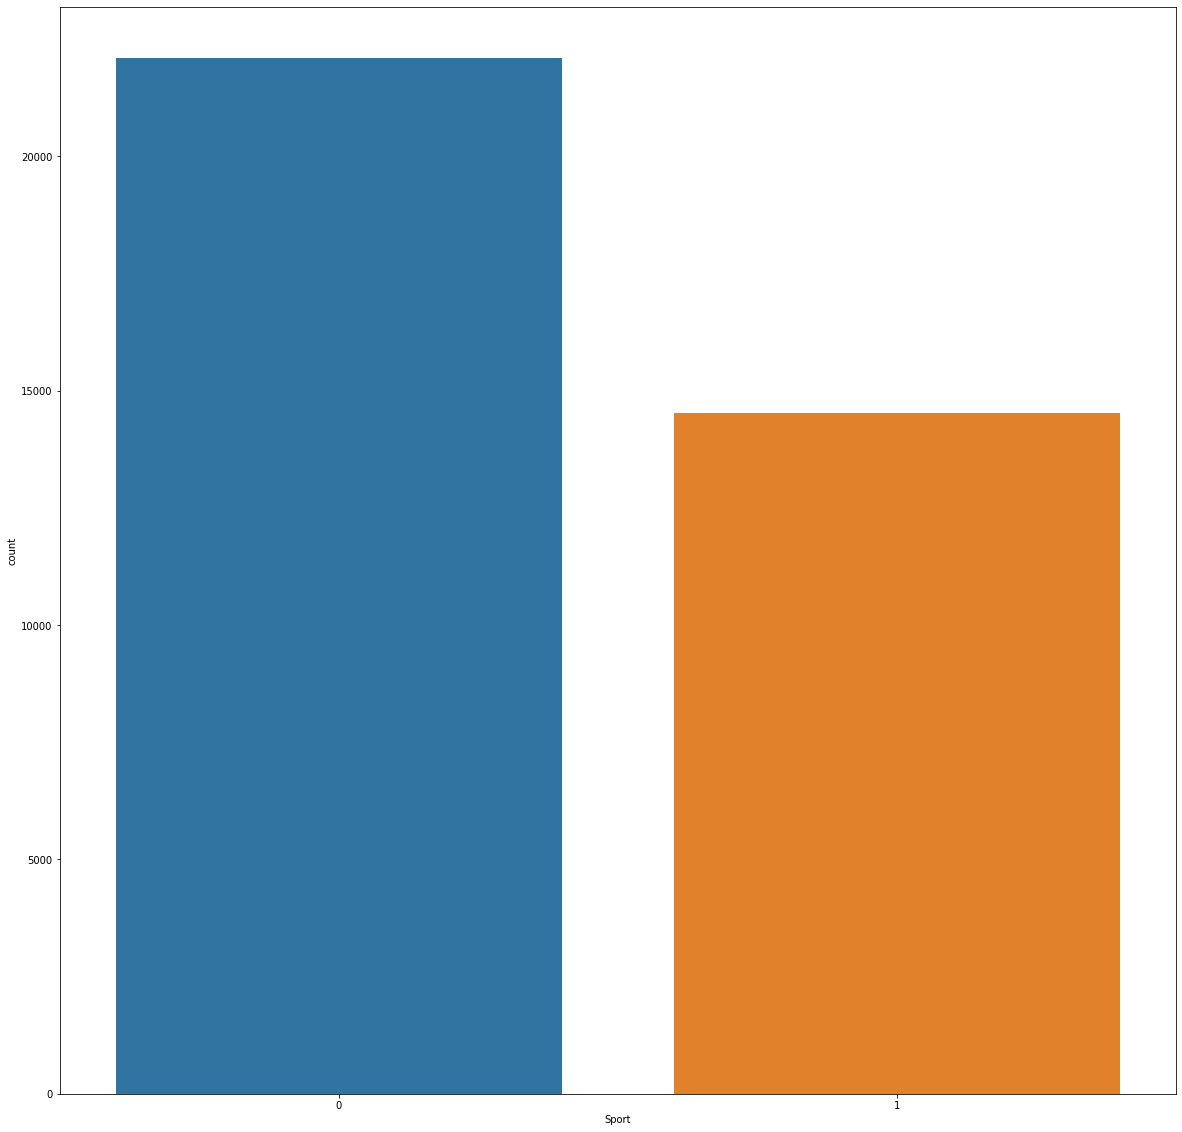

In [218]:
plt.figure(figsize=(20,20))
sns.countplot(df_eda['Sport'])#, 'Trad', 'Boulder', 'TR']])

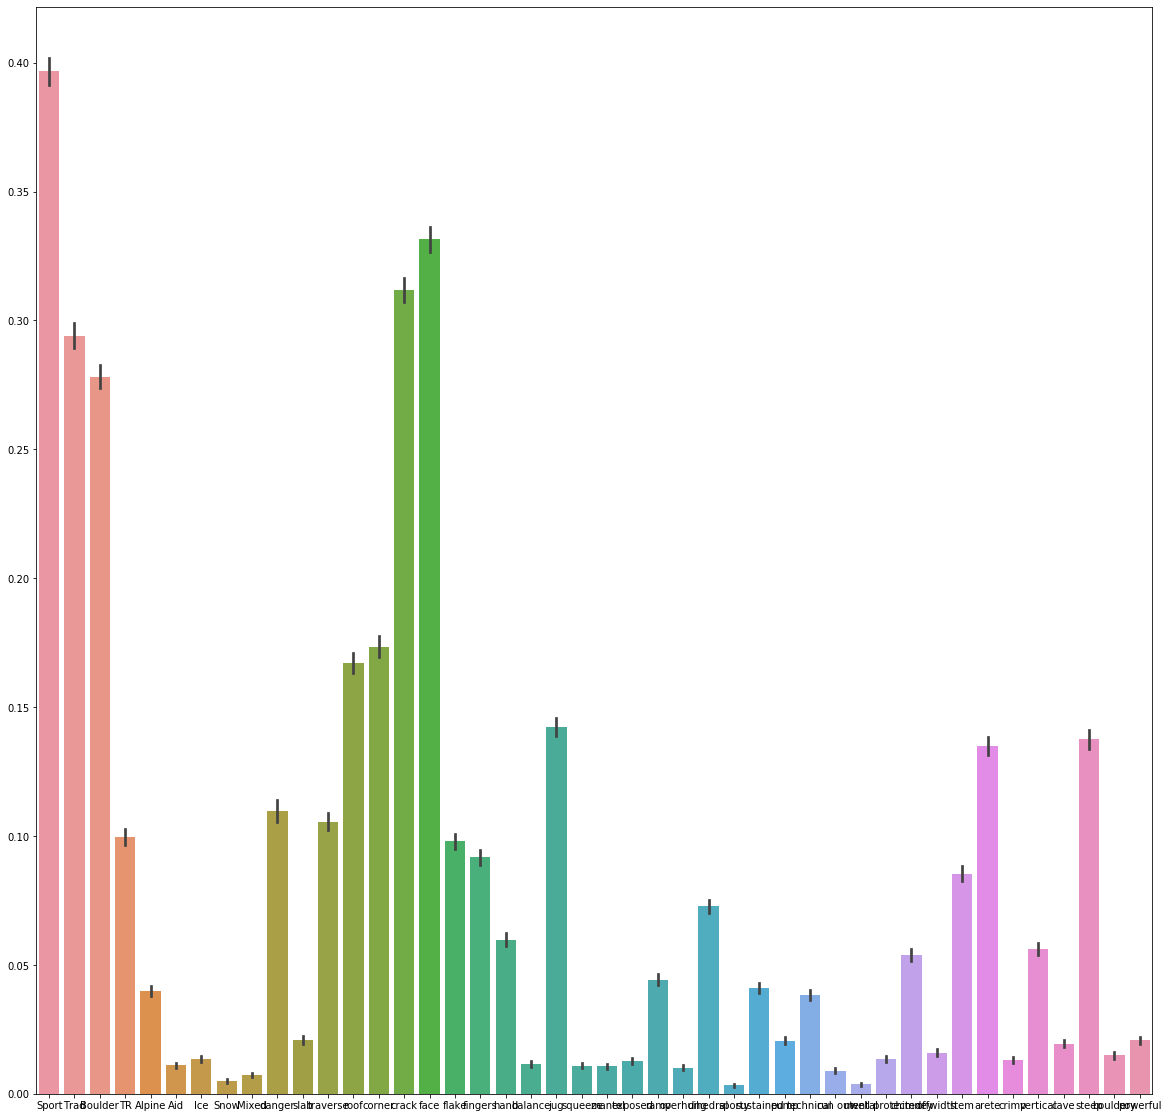

In [211]:
plt.figure(figsize=(20,20))
sns.barplot(data=df_eda)

### Climb Features Distribution

In [1]:
df_graph = pd.melt(df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']])

NameError: name 'pd' is not defined

In [ ]:
plt.figure(figsize=(20,20))
ax=sns.barplot(x="variable", hue="value", data=df_graph)
plt.title('Is my climb a...',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.legend(['No','Yes'])
# plt.set_xlabel(fontsize=20);
plt.savefig('climb_type')

In [265]:
df_graph = pd.melt(df_eda.loc[:,['slab', 'traverse', 'roof', 'corner', 'crack',
       'face', 'flake', 'technical', 'run out', 'mental',
       'well protected', 'chimney', 'offwidth', 'stem', 'arete', 'crimp',
                                 'cave', 'steep', 'powerful']])

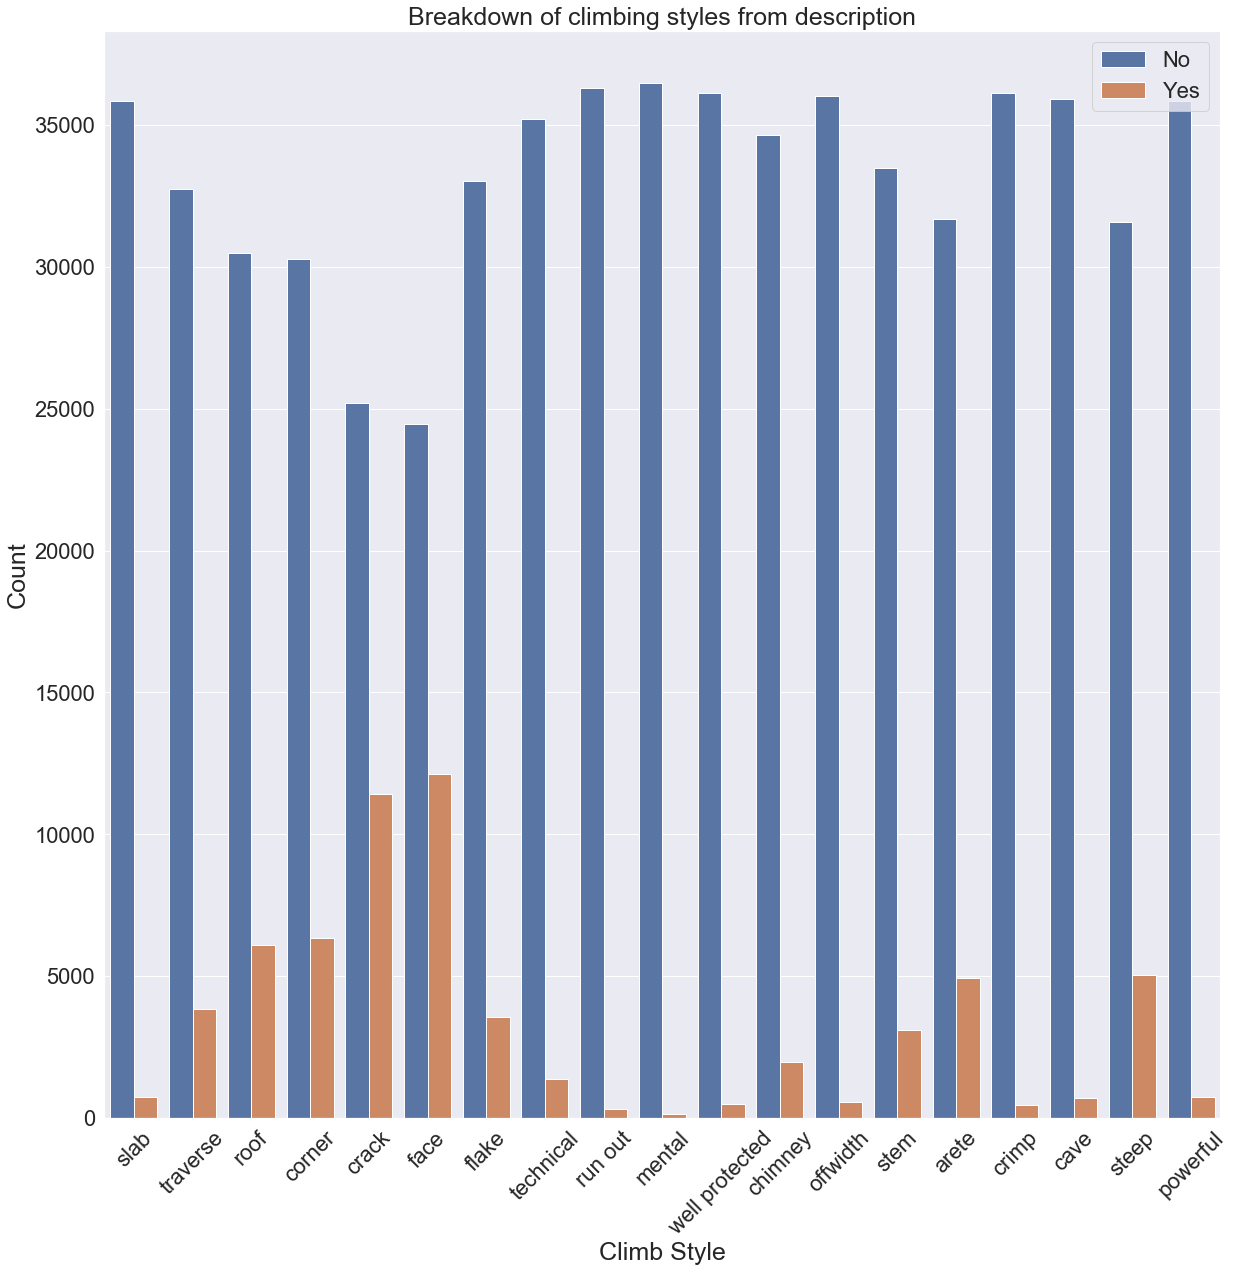

In [267]:
plt.figure(figsize=(20,20))
ax=sns.countplot(x="variable", hue="value", data=df_graph)
plt.title('Breakdown of climbing styles from description',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.legend(['No','Yes'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig('climb_description_type')

In [208]:
# sns.factorplot(x='variable', y='value', data=df, kind='bar')

In [91]:
df_numeric[df_numeric.rating.isna()]

,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,...,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful,in_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105750394,1999,Shooting Star,NaN,4.0,16,1,Colorado,Alpine Rock,Indian Peaks,James Peak,0,-105.689,39.8522,https://www.mountainproject.com/route/10575039...,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
105756508,2671,North Face Couloirs,NaN,4.2,13,1,Colorado,Alpine Rock,Tenmile Range,Pacific Peak,0,-106.123,39.4231,https://www.mountainproject.com/route/10575650...,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
105756727,2695,Dead Dog Couloir,NaN,3.9,45,1,Colorado,Alpine Rock,Torrey's Peak,0,0,-105.821,39.6428,https://www.mountainproject.com/route/10575672...,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
105756754,2698,North Star Couloir,NaN,4.5,8,1,Colorado,CO Ice & Mixed,Indian Peaks & James Peak Wilderness Areas,Arapahoe Peaks,0,-105.644,40.0238,https://www.mountainproject.com/route/10575675...,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
105761478,3099,Audubahn Coulior,NaN,4.0,3,1,Colorado,Alpine Rock,Indian Peaks,Mt. Audubon,0,-105.616,40.0989,https://www.mountainproject.com/route/10576147...,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
105761580,3111,Holy Cross Couloir,NaN,4.1,21,1,Colorado,Alpine Rock,Mount of the Holy Cross,0,0,-106.479,39.4681,https://www.mountainproject.com/route/10576158...,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [92]:
df_numeric.describe()

,orig_index,stars,starVotes,pitches,longitude,latitude,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,slab,traverse,roof,corner,crack,face,flake,...,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful,in_range
count,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,...,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.00000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.0
mean,18304.000000,3.688486,25.277527,1.044251,-105.704041,39.141836,0.396596,0.293971,0.278101,0.099620,0.039744,0.011063,0.013385,0.004890,0.007211,0.109754,5.740938,4.311317,0.020869,0.105548,0.166926,0.173482,0.311809,0.331476,0.097927,...,0.142205,0.010899,0.010653,0.012838,0.044197,0.010079,0.072742,0.003305,0.041055,0.020432,0.038269,0.008987,0.00366,0.013385,0.053730,0.015925,0.085362,0.135021,0.013112,0.056134,0.019367,0.137562,0.014887,0.020760,1.0
std,10568.252339,0.818175,59.027575,1.511342,16.242236,3.858649,0.489198,0.455585,0.448070,0.299497,0.195361,0.104598,0.114917,0.069755,0.084614,0.421213,5.314104,8.666622,0.142948,0.307262,0.372915,0.378669,0.463238,0.470750,0.297220,...,0.349266,0.103829,0.102664,0.112578,0.205535,0.099891,0.259716,0.057397,0.198421,0.141475,0.191848,0.094373,0.06039,0.114917,0.225487,0.125187,0.279423,0.341751,0.113754,0.230183,0.137812,0.344444,0.121103,0.142582,0.0
min,0.000000,0.000000,0.000000,0.000000,-124.353000,29.968500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9152.000000,3.100000,1.000000,0.000000,-118.571000,36.999200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,18304.000000,3.800000,5.000000,1.000000,-110.720000,38.917400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,27456.000000,4.100000,24.000000,1.000000,-105.118000,41.187500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,36608.000000,5.000000,1715.000000,36.000000,-68.207700,51.341600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,17.000000,39.000000,1.000000,1.000000,1.000000,1.000000,

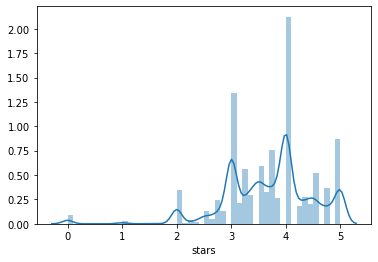

In [93]:
sns.distplot(df_numeric['stars'])

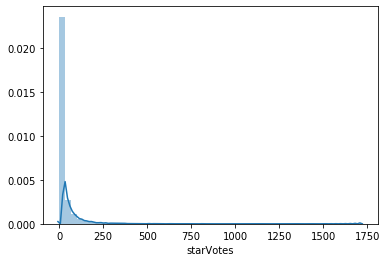

In [94]:
sns.distplot(df_numeric['starVotes'])

In [95]:
df_numeric['pitches'].value_counts()
# plt.xlim(0, 30)     # set the xlim to left, right

1     23017
0      9841
2      1473
3       756
4       515
5       308
6       200
8       114
7       110
9        62
10       60
11       34
12       32
15       19
14       11
13        9
16        9
17        5
19        5
18        4
20        4
22        4
26        3
30        2
35        2
23        2
21        2
36        1
27        1
28        1
33        1
29        1
31        1
Name: pitches, dtype: int64

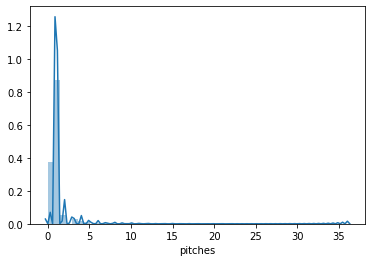

In [96]:
sns.distplot(df_numeric['pitches'])

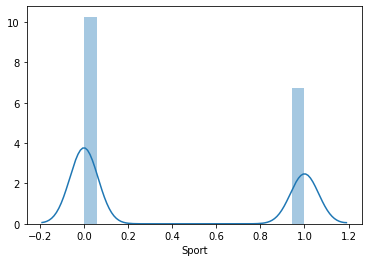

In [97]:
sns.distplot(df_numeric['Sport'])

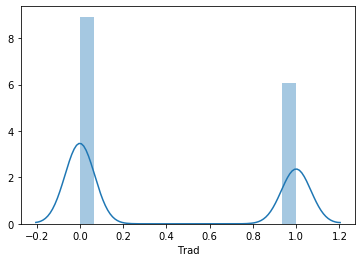

In [98]:
sns.distplot(df_numeric.loc[df_numeric['Boulder']==0,'Trad'])

In [99]:
df_numeric.loc[(df_numeric['Boulder']==0),'name'].count()

26428

In [100]:
df_numeric.loc[(df_numeric['Sport']==1)&(df_numeric['Trad']==1),'name'].count()

622

In [101]:
df_numeric.danger.value_counts()

0    33901
1     1547
2     1012
3      149
Name: danger, dtype: int64

NameError: name 'features' is not defined

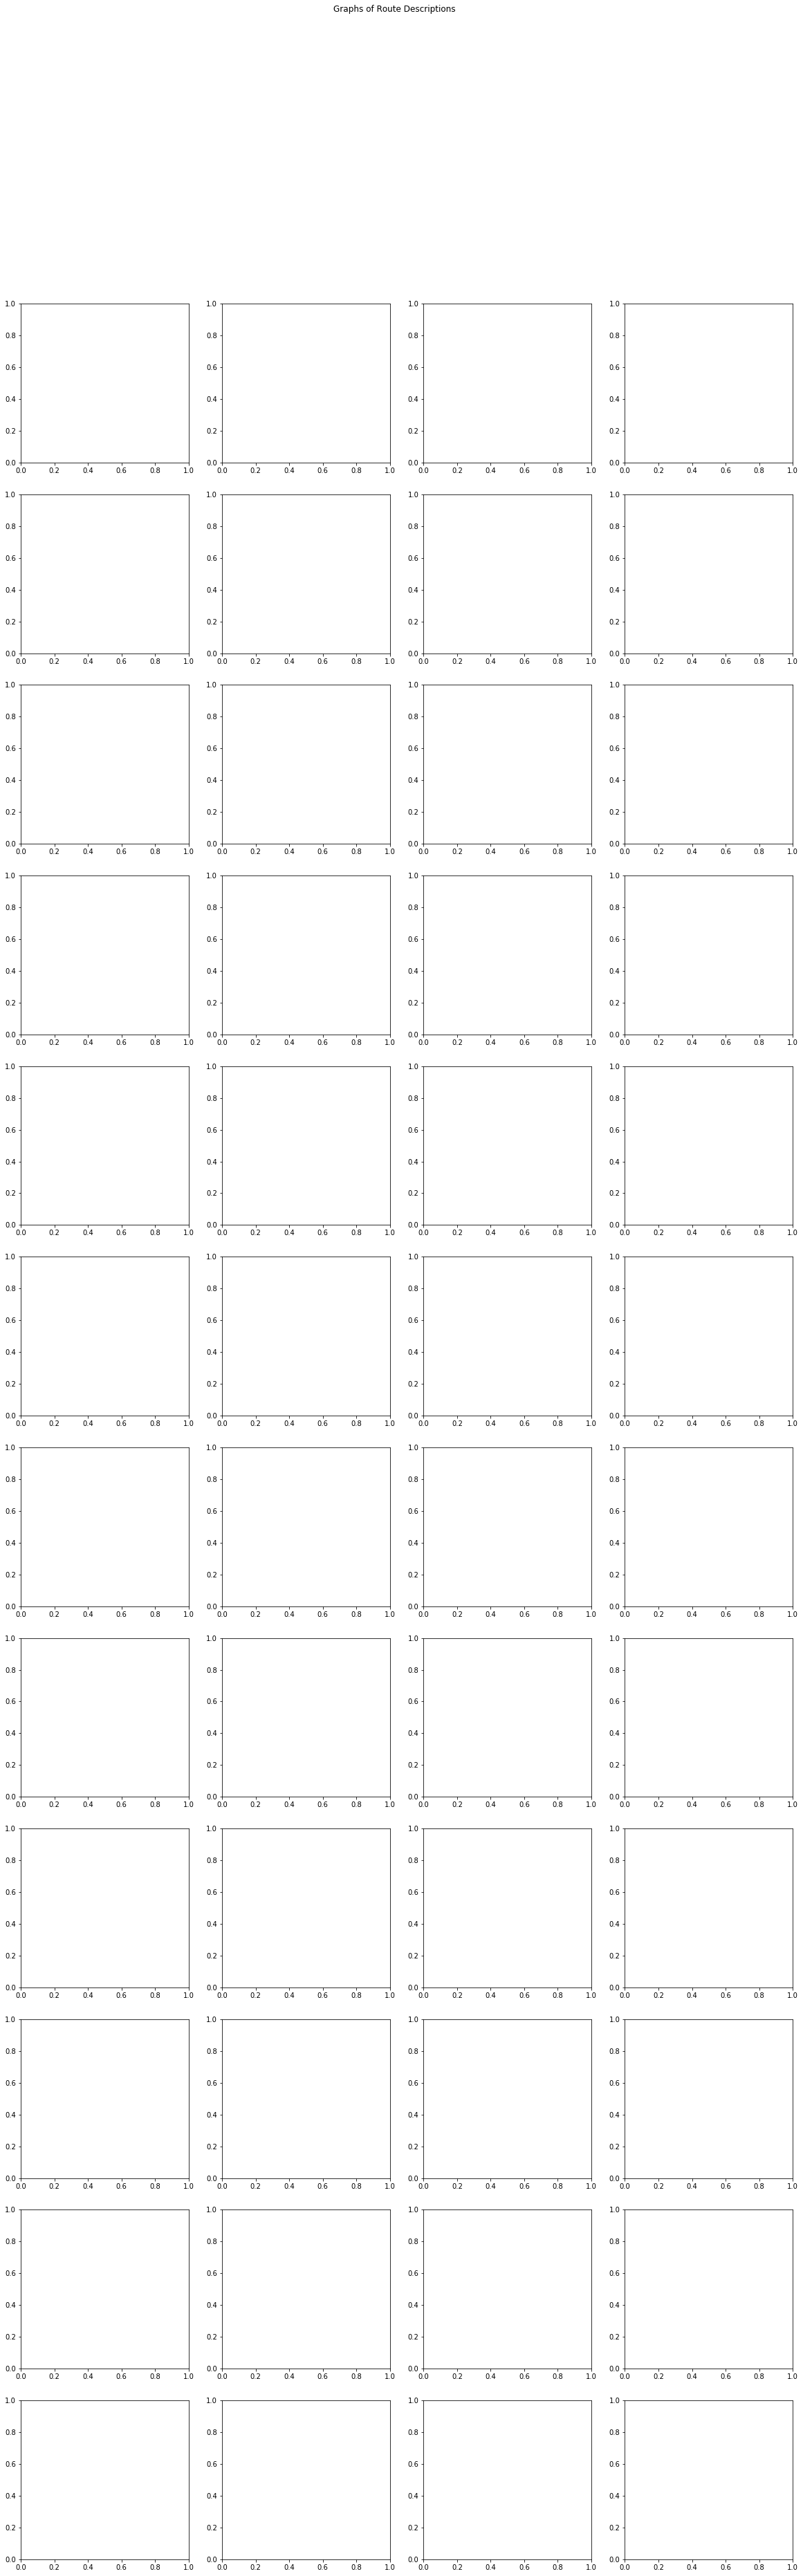

In [102]:
fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(20,60))
fig.suptitle('Graphs of Route Descriptions')

list_of_subplots = np.ravel(axes)

for ax,col_name in zip(list_of_subplots,features.columns):
    ax.hist(features[col_name])
    ax.set_title(f'{col_name} freq')
fig.savefig('freq_graphs')    #saves fig in current folder

## Reccomender

#### Kernel Imports

In [103]:
# Import kernels
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import laplacian_kernel
from sklearn.metrics.pairwise import chi2_kernel



In [104]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

#### Create fxn to see if climb is in search range

In [126]:
#function takes search param range and assigns to original df if climb in_range
def in_range(df_fxn, lat, lon, radius_range=None):
    if radius_range:
        R= 3958.8 
        if (lat == None)|(lon==None):
            df_fxn['in_range'] = 1
        else:
            #assign target coords and set to radians for calc
            lat1 = radians(lat)
            lon1 = radians(lon)
            for index, row in df_fxn.iterrows():
                #assign the lat and lon for each climb
                lat2 = radians(row['latitude'])
                lon2 = radians(row['longitude'])

                dlon = lon2 - lon1
                dlat = lat2 - lat1

                a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
                c = 2 * atan2(sqrt(a), sqrt(1 - a))

                distance = R * c

                #assign in_range col to 1 if the climb is in range
                if distance < radius_range:
                    df_fxn.at[index,'in_range']=1
                else:
                    df_fxn.at[index,'in_range']=0   
    else:
        df_fxn['in_range'] =1



In [134]:
def star_cutoff(df_fxn, star_limit=3.5):
    for index, row in df_fxn.iterrows():
        #assign in_range col to 1 if the climb is in range
        if df_fxn.at[index, 'stars'] >= star_limit:
            df_fxn.at[index,'in_range']=1
        else:
            df_fxn.at[index,'in_range']=0   

#### Call function to assign if climb in range

In [135]:
## used to get list of climbs allowed for comparison
in_range(df_numeric, lat = target_lat, lon = target_lon, radius_range=target_radius_range)

#### Perhaps add star cutoff (ie only give results for routes with above 3.5 stars)

In [176]:
star_cutoff(df_numeric, star_limit)

#### Create df_in_range to run recommender in subset

In [177]:
df_in_range = df_numeric[df_numeric['in_range']==1].reset_index()      #maybe add star filter in this line
target_index =df_in_range.index[df_in_range['id']==target_id][0]
df_in_range.shape

(16641, 63)

### Scale Features

#### Create Features DF

In [178]:
#creates features df used for comparison
features = df_in_range.loc[:,['stars', 'pitches', 'Sport', 'Trad', 'Boulder', 'TR', 'Alpine', 'Aid',
       'Ice', 'Snow', 'Mixed', 'danger', 'rope_grade', 'boulder_grade', 'slab', 'traverse', 'roof', 
        'corner', 'crack', 'face','flake', 'fingers','hand', 'balance', 'jug', 'squeeze', 'mantel', 'exposed', 
        'ramp', 'overhung', 'dihedral', 'sporty', 'sustained','pump', 'technical',
         'run out', 'mental', 'well protected', 'chimney', 'offwidth', 'stem', 'arete',
         'crimp', 'vertical', 'cave', 'steep', 'bouldery', 'powerful']] #,'longitude','latitude',

In [179]:
# features.to_csv('features.csv')

In [180]:
features.shape

(16641, 48)

In [141]:
# features.iloc[:,13].value_counts()

#### Pick scaling type (AND UPDATE WEIGHTS)

In [142]:
min_max_scaler = MinMaxScaler()
scalar = StandardScaler()

In [143]:
##### Pick a scaling option ###############################

# features_scaled = scalar.fit_transform(features)
features_scaled = min_max_scaler.fit_transform(features)

##################################################################

#### Add weight for difficulity of climb

In [144]:
for i in range(features_scaled.shape[0]):
    features_scaled[i][-2]=features_scaled[i][12]*10
    features_scaled[i][-1]=features_scaled[i][13]*10

### Now lets fit the similarity model

#### Rec function

In [145]:
def get_recommendations(idx, kernel_type):

    #value to store scores and indicies
    score_matrix = np.ndarray(shape=(len(df_in_range),2), dtype=float)

    #go through the target climb vs all onthers in our db and populate score mtx with index and similarity
    for i in range(df_in_range.shape[0]):
        score = kernel_type(features_scaled[idx].reshape(1,-1),features_scaled[i].reshape(1,-1))
        score_matrix[i][0] =  i        ##the index comparison corresponding to the score
        score_matrix[i][1] = score     ##the score for the current index

    # Sort the climbs based on the similarity scores
    score_matrix = sorted(score_matrix, key=lambda x: x[1], reverse=True)
    
    # score_matrix
#########################  ADD/calculate SIMilarity VALUE   ###########################

    # # Get the scores of the 20 most similar climbs
    score_matrix = score_matrix[1:20]

    # # Get the climb indices (& cast to ints)
    climb_indices = [int(i[0]) for i in score_matrix]
    
    # Return the top 20 most similar climbs
    return df_in_range.loc[climb_indices,:]

#### Cells for comparison (delete later)

In [146]:
df_numeric[df_numeric['name']=='Leonids']

,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,infos,slab,traverse,roof,corner,crack,face,flake,fingers,hand,balance,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful,in_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105793305,3599,Leonids,5.9,4.6,243,3,California,San Diego and Environs,South San Diego County,El Cajon Mountain,"The Wedge,Left Wall",-116.882,32.9127,https://www.mountainproject.com/route/10579330...,1,0,0,0,0,0,0,0,0,0,17,0,This climb is pretty straight forward. The rou...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [147]:
df_numeric.shape

(36609, 62)

In [148]:
target_index

1483

In [149]:
# df_numeric[(df_numeric['boulder_grade']>5)]

#### Call rec fxn

In [150]:
pd.options.display.max_columns = None

In [2]:
target_index

NameError: name 'target_index' is not defined

In [151]:
rec=get_recommendations(target_index, cosine_similarity)
rec

,id,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,infos,slab,traverse,roof,corner,crack,face,flake,fingers,hand,balance,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful,in_range
9126,109026135,22106,A Lube Job on Tiger Rock,5.8,4.5,2,1,Wyoming,Laramie Range,Laramie Peak Wildlife Habitat Management Area,Kennedy Ranch Rocks,the Meadow Mound,-105.4260,41.9922,https://www.mountainproject.com/route/10902613...,1,0,0,0,0,0,0,0,0,0,14,0,Climb some steep bulges on big hold and some s...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
16304,117990484,36053,Just A Tease,5.9,5.0,2,1,Idaho,North Idaho,Q'Emilin Park,Outlaw Wall,0,-116.9630,47.7011,https://www.mountainproject.com/route/11799048...,1,0,0,0,0,0,0,0,0,0,17,0,Don't leave until you've climbed this route! S...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
14427,115439717,32728,Disco Cowboy,5.8,4.2,9,1,Nevada,Western Nevada,Lake Tahoe,Castle Rock,Village Wall,-119.9090,38.9893,https://www.mountainproject.com/route/11543971...,1,0,0,0,0,0,0,0,0,0,14,0,WARNING: This route is just long enough to low...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
14248,115190074,32440,Afro Sheen,5.9,4.0,2,1,Utah,Echo Canyon,Bear Hollow,Soul Train Wall,0,-111.3930,41.0008,https://www.mountainproject.com/route/11519007...,1,0,0,0,0,0,0,0,0,0,17,0,Crux is where the wall steepens at mid height....,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
15873,117649213,35306,Los Pinos,5.9,4.0,1,1,International,North America,Canada,Alberta,"Banff National Park,Tunnel Mountain",-115.5530,51.1775,https://www.mountainproject.com/route/11764921...,1,0,0,0,0,0,0,0,0,0,17,0,Begin up a left trending ramp and feel around ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9125,109025987,22105,Tiger Woods Me on Tiger Rock,5.8,4.0,5,1,Wyoming,Laramie Range,Laramie Peak Wildlife Habitat Management Area,Kennedy Ranch Rocks,the Meadow Mound,-105.4260,41.9922,https://www.mountainproject.com/route/10902598...,1,0,0,0,0,0,0,0,0,0,14,0,Trample up this tiger skin looking rock over s...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9127,109026285,22108,A Blast from the Past,5.8,4.0,1,1,Wyoming,Laramie Range,Laramie Peak Wildlife Habitat Management Area,Kennedy Ranch Rocks,the Meadow Mound,-105.4260,41.9922,https://www.mountainproject.com/route/10902628...,1,0,0,0,0,0,0,0,0,0,14,0,A low angle start that steeps near the finish....,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
14590,116091376,33048,Crossroads,5.8,4.0,1,1,California,Southern Sierra,Fresno Dome (Wamello) Area,Fresno Dome,"j. Hawk Dome,Main Wall",-119.5380,37.4541,https://www.mountainproject.com/route/11609137...,1,0,0,0,0,0,0,0,0,0,14,0,An enjoyable one excursion across the featured...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15685,117402745,35009,First Black One,5.8,4.0,2,1,Colorado,Steamboat Springs,Town Area,Wax Museum,0,-106.7850,40.5236,https://www.mountainproject.com/route/11740274...,1,0,0,0,0,0,0,0,0,0,14,0,A tricky start on edges and sidepulls leads to...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
16594,118180448,36534,A Feast of Crows,5.8,4.0,1,1,Oregon,Southwest Oregon,The Callahans,Westeros,Griffin's Roost,-123.5690,43.2188,https://www.mountainproject.com/route/11818044...,1,0,0,0,0,0,0,0,0,0,14,0,Climbs the east leg of Griffin's Roost. Where ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [152]:
rec=get_recommendations(target_index, rbf_kernel)
rec

,id,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,infos,slab,traverse,roof,corner,crack,face,flake,fingers,hand,balance,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful,in_range
16304,117990484,36053,Just A Tease,5.9,5.0,2,1,Idaho,North Idaho,Q'Emilin Park,Outlaw Wall,0,-116.9630,47.7011,https://www.mountainproject.com/route/11799048...,1,0,0,0,0,0,0,0,0,0,17,0,Don't leave until you've climbed this route! S...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
14248,115190074,32440,Afro Sheen,5.9,4.0,2,1,Utah,Echo Canyon,Bear Hollow,Soul Train Wall,0,-111.3930,41.0008,https://www.mountainproject.com/route/11519007...,1,0,0,0,0,0,0,0,0,0,17,0,Crux is where the wall steepens at mid height....,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
15873,117649213,35306,Los Pinos,5.9,4.0,1,1,International,North America,Canada,Alberta,"Banff National Park,Tunnel Mountain",-115.5530,51.1775,https://www.mountainproject.com/route/11764921...,1,0,0,0,0,0,0,0,0,0,17,0,Begin up a left trending ramp and feel around ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
429,105737426,1097,Thin Man,5.9 R,4.0,29,1,California,Central Coast,San Luis Obispo,Bishop Peak,Shadow Rock,-120.6960,35.3037,https://www.mountainproject.com/route/10573742...,1,0,0,0,0,0,0,0,0,2,17,0,The last route to the left of Shadow before yo...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4573,106523397,11068,Vertebrae,5.9,4.6,10,2,New York,Adirondacks,G: Indian Lake Region,Snowy Mt,0,-74.3866,43.6996,https://www.mountainproject.com/route/10652339...,1,0,0,0,0,0,0,0,0,0,17,0,You'll want dry weather for this one. Both pi...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8078,108174463,19806,Jitters,5.9,4.6,13,1,California,Lake Tahoe,Truckee River Canyon,Deep Creek Crags,The Arena,-120.2320,39.2590,https://www.mountainproject.com/route/10817446...,1,0,0,0,1,0,0,0,0,0,17,0,The righthand route on this section of wall. ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
16278,117969032,36018,Greybeard,5.9+,4.5,2,1,Idaho,North Idaho,Q'Emilin Park,Outlaw Wall,0,-116.9630,47.7011,https://www.mountainproject.com/route/11796903...,1,0,0,0,0,0,0,0,0,0,17,0,Great route that needs some traffic! Fun route...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7911,108071653,19402,Wild Rock,5.9,4.7,3,1,International,North America,Canada,British Columbia,"Kamloops,Roche Lake Left",-120.1960,50.4965,https://www.mountainproject.com/route/10807165...,1,0,0,0,0,0,0,0,0,0,17,0,some awkward pulls and a lot of fun. Always c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6894,107482059,16795,Red Mite,5.9,4.8,4,1,Wyoming,Laramie Range,Laramie Peak Wildlife Habitat Management Area,Reese Mountain,"Southwest Ridge of Reese Mtn,The Book Pages Mo...",-105.3730,42.0045,https://www.mountainproject.com/route/10748205...,1,0,0,0,0,0,0,0,0,0,17,0,Make the airy step left onto the wall and foll...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7907,108071276,19392,Bradycardia,5.9,4.4,5,1,International,North America,Canada,British Columbia,"Kamloops,Beach - Left",-120.7240,50.7524,https://www.mountainproject.com/route/10807127...,1,0,0,0,0,0,0,0,0,0,17,0,Awesome new route that gets progressively hard...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [153]:
rec=get_recommendations(target_index, laplacian_kernel)
rec

,id,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,infos,slab,traverse,roof,corner,crack,face,flake,fingers,hand,balance,jug,squeeze,mantel,exposed,ramp,overhung,dihedral,sporty,sustained,pump,technical,run out,mental,well protected,chimney,offwidth,stem,arete,crimp,vertical,cave,steep,bouldery,powerful,in_range
16304,117990484,36053,Just A Tease,5.9,5.0,2,1,Idaho,North Idaho,Q'Emilin Park,Outlaw Wall,0,-116.9630,47.7011,https://www.mountainproject.com/route/11799048...,1,0,0,0,0,0,0,0,0,0,17,0,Don't leave until you've climbed this route! S...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
14248,115190074,32440,Afro Sheen,5.9,4.0,2,1,Utah,Echo Canyon,Bear Hollow,Soul Train Wall,0,-111.3930,41.0008,https://www.mountainproject.com/route/11519007...,1,0,0,0,0,0,0,0,0,0,17,0,Crux is where the wall steepens at mid height....,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
15873,117649213,35306,Los Pinos,5.9,4.0,1,1,International,North America,Canada,Alberta,"Banff National Park,Tunnel Mountain",-115.5530,51.1775,https://www.mountainproject.com/route/11764921...,1,0,0,0,0,0,0,0,0,0,17,0,Begin up a left trending ramp and feel around ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4573,106523397,11068,Vertebrae,5.9,4.6,10,2,New York,Adirondacks,G: Indian Lake Region,Snowy Mt,0,-74.3866,43.6996,https://www.mountainproject.com/route/10652339...,1,0,0,0,0,0,0,0,0,0,17,0,You'll want dry weather for this one. Both pi...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8078,108174463,19806,Jitters,5.9,4.6,13,1,California,Lake Tahoe,Truckee River Canyon,Deep Creek Crags,The Arena,-120.2320,39.2590,https://www.mountainproject.com/route/10817446...,1,0,0,0,1,0,0,0,0,0,17,0,The righthand route on this section of wall. ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
16278,117969032,36018,Greybeard,5.9+,4.5,2,1,Idaho,North Idaho,Q'Emilin Park,Outlaw Wall,0,-116.9630,47.7011,https://www.mountainproject.com/route/11796903...,1,0,0,0,0,0,0,0,0,0,17,0,Great route that needs some traffic! Fun route...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7911,108071653,19402,Wild Rock,5.9,4.7,3,1,International,North America,Canada,British Columbia,"Kamloops,Roche Lake Left",-120.1960,50.4965,https://www.mountainproject.com/route/10807165...,1,0,0,0,0,0,0,0,0,0,17,0,some awkward pulls and a lot of fun. Always c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6894,107482059,16795,Red Mite,5.9,4.8,4,1,Wyoming,Laramie Range,Laramie Peak Wildlife Habitat Management Area,Reese Mountain,"Southwest Ridge of Reese Mtn,The Book Pages Mo...",-105.3730,42.0045,https://www.mountainproject.com/route/10748205...,1,0,0,0,0,0,0,0,0,0,17,0,Make the airy step left onto the wall and foll...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7907,108071276,19392,Bradycardia,5.9,4.4,5,1,International,North America,Canada,British Columbia,"Kamloops,Beach - Left",-120.7240,50.7524,https://www.mountainproject.com/route/10807127...,1,0,0,0,0,0,0,0,0,0,17,0,Awesome new route that gets progressively hard...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
429,105737426,1097,Thin Man,5.9 R,4.0,29,1,California,Central Coast,San Luis Obispo,Bishop Peak,Shadow Rock,-120.6960,35.3037,https://www.mountainproject.com/route/10573742...,1,0,0,0,0,0,0,0,0,2,17,0,The last route to the left of Shadow before yo...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
rec=get_recommendations(target_index, euclidean_distances)
rec

In [ ]:
rec=get_recommendations(target_index, linear_kernel)
rec

In [ ]:
rec=get_recommendations(target_index, polynomial_kernel)
rec

In [ ]:
rec=get_recommendations(target_index, sigmoid_kernel)
rec

In [ ]:
# rec=get_recommendations(climb_id, chi2_kernel)
# rec

## NLP 

### Import NLP Data (redundent delete later)

In [ ]:
df_nlp = query_helper.query_to_df('SELECT * FROM route_description;')
df_nlp.set_index('id', inplace=True)
df_nlp.head()

In [ ]:
key_words = ['slab', 'traverse', 'roof', 'corner', 'ledge', 'crack', 'face','flake', 'finger', 'fingers',
             'hand', 'hands', 'arch', 'balancy', 'balance', 'jug', 'squeeze', 'mantel', 'sustained',  
             'ramp', 'overhung', 'dihedral', 'sporty', 'heady', 'pump', 'pumpy', 'technical',
             'run out', 'mental', 'well protected', 'chimney', 'offwidth', 'stem', 'arete', 'exposed', 'exposure',
             'crimp','crimpy', 'vertical', 'slabby', 'cave', 'steep', 'bouldery'. 'powerful']

In [ ]:
col_key_words = ['slab', 'traverse', 'roof', 'corner', 'ledge', 'crack', 'face','flake', 'finger',
             'hand', 'arch', 'balancy', 'jug', 'squeeze', 'mantel', 'exposed', 
             'ramp', 'overhung', 'dihedral', 'sporty', 'sustained','pump', 'technical',
             'run out', 'mental', 'well protected', 'chimney', 'offwidth', 'stem', 'arete',
             'crimp', 'vertical', 'cave', 'steep', 'bouldery', 'powerful']

In [ ]:
df_numeric

In [ ]:
df_full = df_numeric.join(df_nlp)
df_full.head()

In [ ]:
df_numeric.head()

### Break descriptions into rope and boulder

#### Rope

In [ ]:
df_sub = df_numeric[(df_numeric['Boulder']==0)]
df_sub = df_sub[(df_numeric['Ice']==0)]
df_sub = df_sub[(df_numeric['Snow']==0)]

df_sub.head()

In [ ]:
df_sub.Boulder.value_counts()

In [ ]:
len(df_sub.index)

In [ ]:
len(df_nlp.loc[df_sub.index])

In [ ]:
nlp_rope =df_nlp.loc[df_sub.index]

In [ ]:
nlp_rope.head()

#### Boulder

#### Tokenizer

In [154]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [ ]:
extra_stop = ['climb','climbing', 'crux', 'rope', 'leave', 'use', 'start', 'end',
              'look', 'rock', 'tree', 'follow', 'continue', 'belay', 'photo', 'add', 'climber', 'route', 
              'lot', 'anchor', '...', '1', '2', '3', '4', '--', 'pitch', 'page', 'cold', 'hot', 'warm',
              'belayer', 'fun', 'like', 'unknown', 'rap', 'left', 'right', 'wide', 'leader']


In [ ]:
for word in extra_stop:
    stop_words.add(word)

In [ ]:
stop_words

In [155]:
# Creating our tokenizer function
def spacy_tokenizer(text):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(text)
    
#     mytokens = [word for word in mytokens if word.pos_ != "PROPN"]
    
    mytokens = [ word if word.pos_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

### TF-IDF Vectorizer

#### Run the vectorizer

In [166]:
df_nlp.loc[105714722,:]

infos    The Central Yellow Wall is a classic must-do p...
Name: 105714722, dtype: object

In [169]:
df_nlp[df_nlp.isna().values]

,infos
id,
117568267,NaN


In [157]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, min_df=5, max_df=.7)


#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_nlp['infos'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

ValueError: np.nan is an invalid document, expected byte or unicode string.

#### Save it to load later

In [ ]:
# Save the trained model as a pickle string. 
from sklearn.externals import joblib 
import pickle
tfidf_5_7 = pickle.dumps(tfidf_matrix) 

  
# Save the model as a pickle in a file 
joblib.dump(tfidf_matrix, 'tfidf_5_7.pkl') 
  
# Load the model from the file 
# tfidf_loaded = joblib.load('tfidf_5_7.pkl')  
  

### Get original index

In [ ]:
#get index to iterate over
search_range = df_in_range.orig_index

# get index for target in reference to whole matrix
nlp_target_index = int(df_in_range.orig_index[df_in_range['id']==target_id].values)
print('target_index:',nlp_target_index)

In [ ]:
df_nlp.loc[105793305]

In [ ]:
######NEED TO COMBINE WITH get_recommendations so we can get average weighted score#########################
def get_recommendations_for_nlp(idx, kernel_type):

    #value to store scores and indicies
    score_matrix = np.ndarray(shape=(len(df_in_range),2), dtype=float)
    
    for iter_,i in enumerate(search_range.values):
        score = kernel_type(tfidf_matrix[idx],tfidf_matrix[i])
        score_matrix[iter_][0] =  i        ##the index comparison corresponding to the score
        score_matrix[iter_][1] = score     ##the score for the current index

    # Sort the climbs based on the similarity scores
    score_matrix = sorted(score_matrix, key=lambda x: x[1], reverse=True)
    
    # score_matrix
#########################  ADD/calculate SIMilarity VALUE   ###########################

    # # Get the scores of the 20 most similar climbs
    score_matrix = score_matrix[1:20]

    # # Get the climb indices (& cast to ints)
    climb_indices = [int(i[0]) for i in score_matrix]
    
    # Return the top 20 most similar climbs
    return df_numeric.iloc[climb_indices,:]

In [ ]:
rec = get_recommendations_for_nlp(nlp_target_index, cosine_similarity)
rec

In [ ]:
df_nlp.loc[rec.index]

### LDA

#### CV

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(tokenizer=spacy_tokenizer, max_df=0.90, min_df=5, stop_words='english', ngram_range=(1,1))

In [ ]:
dtm = cv.fit_transform(nlp_rope['info'].sample(n=1000, random_state=1))

#### LDA Model

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=20,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=32,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

print(lda_model)  # Model attributes

In [ ]:
# This can take awhile, we're dealing with a large amount of documents!

lda_output = lda_model.fit_transform(dtm)


#### Diagnose model performance with perplexity and log-likelihood
A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. Let’s check for our model.



In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(dtm))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(dtm))

# See model parameters
print(lda_model.get_params())

In [ ]:
len(lda_model.components_)

In [ ]:
single_topic = lda_model.components_[0]

In [ ]:
top_word_indices = single_topic.argsort()[-10:]

In [ ]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

#### Top words for all groups

In [ ]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

In [ ]:
extra_stop = ['climb','climbing', 'crux', 'rope', 'leave', 'use', 'start', 'end',
              'look', 'rock', 'tree', 'follow', 'continue', 'belay', 'photo', 'add', 'climber', 'route', 
              'lot', 'anchor', '...', '1', '2', '3', '4', '--', 'pitch', 'page', 'cold', 'hot', 'warm',
              'belayer', 'fun', 'like', 'unknown', 'rap', 'left', 'right']



### Try new reverse tokenizer

In [ ]:
key_words = ['slab', 'traverse', 'roof', 'corner', 'ledge', 'crack', 'face','flake', 'bolt', 'finger', 'fingers'
             'cam', 'camalot', 'hand', 'hands', 'arch', 'balancy', 'jug', 'squeeze', 'mantel', 'sustained', 'nut', 
             'gear', 'ramp', 'overhung', 'balance', 'dihedral', 'sporty', 'heady', 'pump', 'pumpy', 'technical',
             'run out', 'mental', 'well protected', 'chimney', 'offwidth', 'stem', 'arete', 'exposed', 'exposure',
             'crimp','crimpy', 'vertical', 'slabby', 'cave', 'steep', 'sidepull','bouldery']

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer_reverse(text):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(text)
    
#     mytokens = [word for word in mytokens if word.pos_ != "PROPN"]
    
    mytokens = [ word if word.pos_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    #grab only my key words
    my_sub_tokens =[]
    for word in set(mytokens):
        if word in key_words:
            my_sub_tokens.append(word)

    # return preprocessed list of tokens
    return my_sub_tokens

#### CV

In [ ]:
cv = CountVectorizer(tokenizer=spacy_tokenizer_reverse,  stop_words='english', ngram_range=(1,1))

In [ ]:
dtm = cv.fit_transform(nlp_rope['info'].sample(n=1000, random_state=1))

#### LDA Model

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=6,               # Number of topics
                                      max_iter=20,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=32,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

print(lda_model)  # Model attributes

In [ ]:
# This can take awhile, we're dealing with a large amount of documents!

lda_output = lda_model.fit_transform(dtm)


#### Diagnose model performance with perplexity and log-likelihood
A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. Let’s check for our model.



In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(dtm))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(dtm))

# See model parameters
print(lda_model.get_params())

#### Top words for all groups

In [ ]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')